# K-nearest neighbors

We are using the [CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.
After downloading `cifar-10-python.tar.gz` to this folder run `tar -xvf cifar-100-python.tar.gz`


In [3]:
import numpy as np

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict



def distance(ndarr1, ndarr2):
    return (np.sum((ndarr1 - ndarr2) ** 2)).item() ** .5



In [4]:
train = unpickle('cifar-10-batches-py/data_batch_1')
test = unpickle('cifar-10-batches-py/test_batch')

train_data = train[b'data']
train_labels = train[b'labels']

test_data = test[b'data'][:1000]
test_labels = test[b'labels'][:1000]

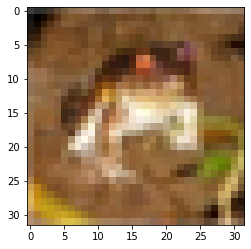

In [5]:
# Output a sample image
from matplotlib.pyplot import imshow

sample = train_data[0]


def convertTensor(sample):
    size = 32 * 32
    r = sample[:size].reshape((32, 32))
    g = sample[size:2*size].reshape((32, 32))
    b = sample[2*size:].reshape((32, 32))
    
    return np.dstack((r, g, b))

    
imshow(convertTensor(sample))

In [6]:
# Define k nearest neighbors algorithm
import heapq 
from collections import Counter

class LabeledDistance:  #https://stackoverflow.com/questions/2501457/what-do-i-use-for-a-max-heap-implementation-in-python
  def __init__(self, distance, label): 
      self.distance = distance
      self.label = label
  def __lt__(self, other):
      return self.distance > other.distance
  def __eq__(self, other):
      return self.distance == other.distance
  def __str__(self): return f"Label: {self.label} Distance: {self.val}"

class MaxHeap:
  def __init__(self): self.h = []
  def heappush(self, d, l): heapq.heappush(self.h, LabeledDistance(d, l))
  def heappop(self): return heapq.heappop(self.h)
  def __len__(self): return len(self.h)      
  def __getitem__(self, i): return self.h[i]
  def get_majority(self):
      return Counter([d.label for d in self.h]).most_common()[0][0]




def find_label(test_sample, train, k=1):
    smallest = MaxHeap()

    for sample, label in zip(train[b'data'], train[b'labels']):
        # Do not consider this sample if the distance is bigger than the biggest of the smallest        
        # However, if the maxheap is not full yet, insert anyway
        if len(smallest) != 0 and distance(test_sample, sample) >= smallest[0].distance and len(smallest) >= k:
            continue
        
        if len(smallest) == k:
            smallest.heappop() # remove the worst value

        smallest.heappush(distance(test_sample, sample), label)
    
    return smallest.get_majority()
    




In [18]:
# Define testing algorithm

def test_classifier(k=1):
    correct = 0
    total = 0
    for sample, label in zip(test_data, test_labels):
        print(f'Testing no. {total + 1}', end='\r')        
        pred = find_label(sample, train, k=k)
        if pred == label:
            correct += 1
        total += 1
    
    return correct / total


In [13]:
test_classifier(k=2)

Testing no. 1
Testing no. 2
Testing no. 3
Testing no. 4
Testing no. 5
Testing no. 6
Testing no. 7
Testing no. 8
Testing no. 9
Testing no. 10
Testing no. 11
Testing no. 12
Testing no. 13
Testing no. 14
Testing no. 15
Testing no. 16
Testing no. 17
Testing no. 18
Testing no. 19
Testing no. 20
Testing no. 21
Testing no. 22
Testing no. 23
Testing no. 24
Testing no. 25
Testing no. 26
Testing no. 27
Testing no. 28
Testing no. 29
Testing no. 30
Testing no. 31
Testing no. 32
Testing no. 33
Testing no. 34
Testing no. 35
Testing no. 36
Testing no. 37


KeyboardInterrupt: 

lmao
